# Week 06 - Assignment 03 - Antonio Silva (D23129331)

## Table of Contents
1. [Submission](#submission)
2. [Introduction](#introduction)
3. [Dataset Description](#dataset)
4. [Exploratory Data Analysis (EDA)](#eda)
5. [Data Preprocessing](#preprocessing)
    - 5.1. [Outlier detection](#outlier)
    - 5.2. [Handling missing values](#missing)
    - 5.3. [Feature Engineering](#transform)
    - 5.4. [Encode categorical variables](#encode)
    - 5.5. [Feature Selection](#selection)
6. [Modeling](#modeling)
    - 6.1. [Splitting Data](#splitting)
    - 6.2. [Logistic Regression](#regression)
    - 6.3. [Support Vector Machine (SVM)](#svm)
    - 6.4. [Model Comparison](#comparison)
7. [Conclusion](#conclusion)
---------------

## 1. Submission <a id="submission"></a>

- Choose a real world dataset (you can use Kaggle)
- Use concepts and methods that we have studied today
- Compare their performance and provide insights in your own workds

-----------------------------

## 2. Introduction <a id="introduction"></a> 
For this submission, and after reviewing what we've studied in recent weeks, I believe selecting the right dataset is crucial for applying different methods, comparing them, and analyzing the results. 

After a brief search, I chose the Titanic dataset, available [here](https://github.com/datasciencedojo/datasets/blob/master/titanic.csv). It is a great example due to its easy interpretability, showing how features like age, gender, and class affect survival probability. Additionally, its binary outcome (survived or not) makes it ideal for a classification problem.

I will test the how this dataset performs agains this two algorithms:
- Logistic Regression
- Support Vector Machine (SVM)

Both algorithms are well-suited for performing classification on the given dataset. I will complete the project by comparing their results and drawing a conclusion.

-------------------------

## 3. Dataset Description <a id="dataset"></a>

The Titanic dataset has details about the passengers of the RMS Titanic, the ship that tragically sank on its first voyage in 1912.

It includes the following features:

| Feature     | Type                  | Description                                                         |
|-------------|-----------------------|---------------------------------------------------------------------|
| PassengerId | Categorical (Numeric) | Unique Identifier for each passenger                                |
| Survived    | Categorical (Binary)  | 1 = Survived, 0 = Did not Survive                                   |
| Pclass      | Categorical (Ordinal) | Passenger's class: 1st - Upper, 2nd - Middle, 3rd - Lower           |
| Name        | Categorical (Text)    | Passenger's Name                                                    |
| Sex         | Categorical (Binary)  | Male or Female                                                      |
| Age         | Numerical (Float)     | Passenger's Age. Age is fractional if less than 1                   |
| SibSp       | Numerical (Integer)   | Number of siblings aboard                                           |
| Parch       | Numerical (Integer)   | Number of parents and children aboard                               |
| Ticket      | Categorical (Text)    | Ticket Number                                                       |
| Fare        | Numerical (Float)     | Ticket's Price                                                      |
| Cabin       | Categorical (Text)    | Cabin Number                                                        |
| Embarked    | Categorical           | Port of embarkation: S = Southampton, C = Cherbourg, Q = Queenstown |

The goal is to predict whether a passenger survived the disaster or not using the `Survived` target variable.

-----------------------

## 4. Exploratory Data Analysis (EDA) <a id="eda"></a>

The goal of the EDA is to gain insights into the dataset by exploring the features, including:
- Their relationships with each other
- Their significance

In [8]:
# Import required packages

# Data preparation
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, make_scorer, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.inspection import permutation_importance

#Other
import warnings

# Hide all warnings
warnings.filterwarnings('ignore')

# Visualization configuration
sns.set_style("whitegrid")
sns.set_palette("muted")

%matplotlib inline

In [9]:
# Load the Dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Basic dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Data Info Insights**

By the dataset information we can tell that:
- Has 12 columns (1 Target variable identified as `Survived`)
- Has 891 Passengers (Rows)
- Age, Cabin, Embarked have missing values

In [12]:
# describe numerical data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Numerical Data Description Insights**

From the numerical data description, we can observe the following:
- The average age is 29.7, with a median of 28, indicating a relatively young population and a fairly symmetrical age distribution. The age variance is 14.53, showing some variability.
- The fare ranges from 0 to 512, with a standard deviation of 49.7, suggesting the presence of outliers (the 3rd quartile for fare is 31).
- Most passengers were in 3rd class (median = 3), and the majority had no siblings aboard (median = 0).


In [14]:
# Count passengers by sex
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [15]:
# Count embarked per town
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

**Categorical Data Description Insights**

- The majority of the passengers on the Titanic were male, with almost twice as many males as females. This imbalance could have implications for survival rates.
- Most passengers boarded at Southampton (S), with far fewer boarding at Cherbourg (C) and Queenstown (Q)

In [17]:
# Missing data
missing_data = data.isnull().sum()
missing_data[missing_data > 0] 

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

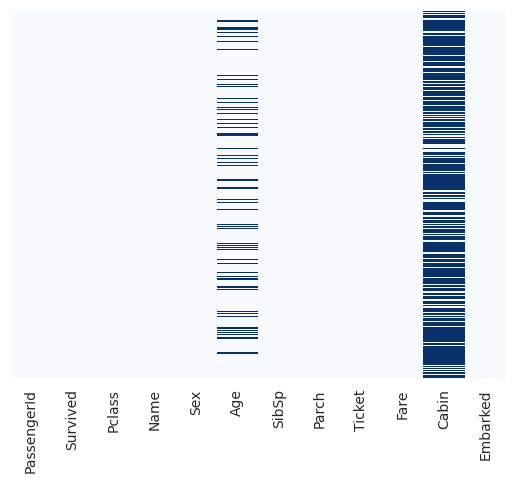

In [18]:
# Missing data spread visualization
sns.heatmap(data.isnull(), yticklabels=False, annot=False, cbar=False, cmap='Blues')

**Missing Data Insights**

- Most passengers don't have cabin information, making it a less useful feature for survival classification.
- Missing values in the Age column can be filled (imputed).
- Only two rows have missing values for Embarked, which can also be easily imputed.

<Axes: xlabel='Survived', ylabel='count'>

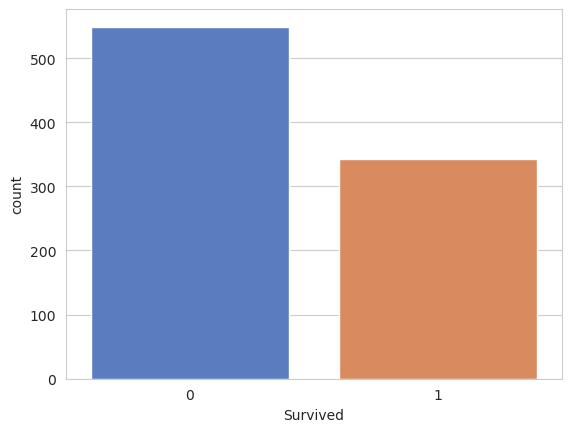

In [20]:
# Target variable balance
sns.countplot(data=data, x='Survived')

**Target Variable Balance Insights**

There is an imbalance between the two classes, with more passengers in the "Did Not Survive" category compared to the "Survived" category. This imbalance can
impact the performance of machine learning models, potentially leading to biased predictions favoring the majority class (in this case, "Did Not Survive").

<Axes: xlabel='Survived', ylabel='count'>

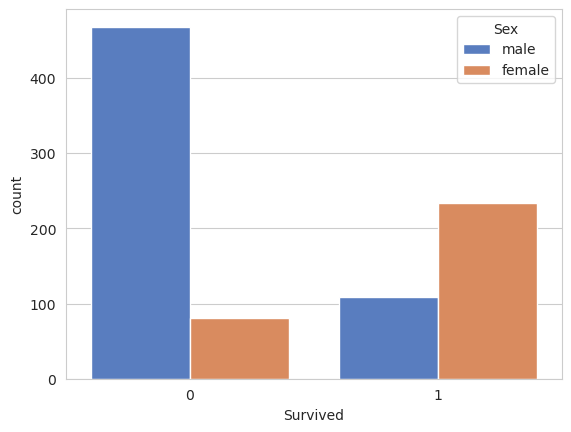

In [22]:
sns.countplot(data=data, x='Survived', hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

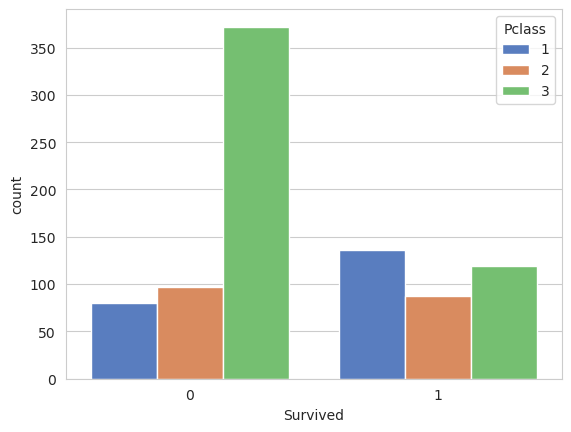

In [23]:
sns.countplot(data=data, x='Survived', hue='Pclass')

**Target Class Insights**

- The majority of passengers did not survive.
- Most of the survivors were women.
- Most of the passengers who did not survive were in 3rd class.

<Axes: xlabel='Age', ylabel='Count'>

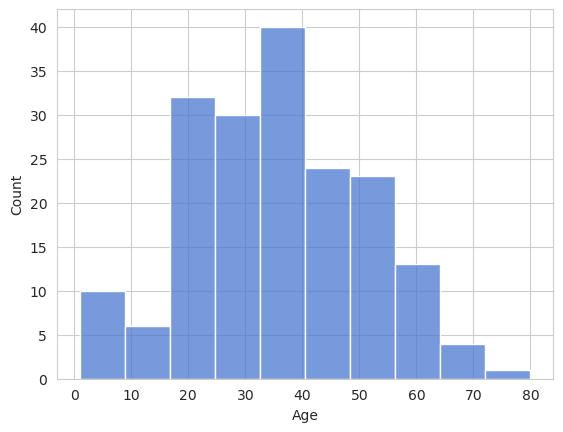

In [25]:
# Age distribution
sns.histplot(data=data.dropna(), x='Age')

**Age distribution Insights**

- The majority of passengers were aged between 20 and 40 years.

<Axes: xlabel='Parch', ylabel='count'>

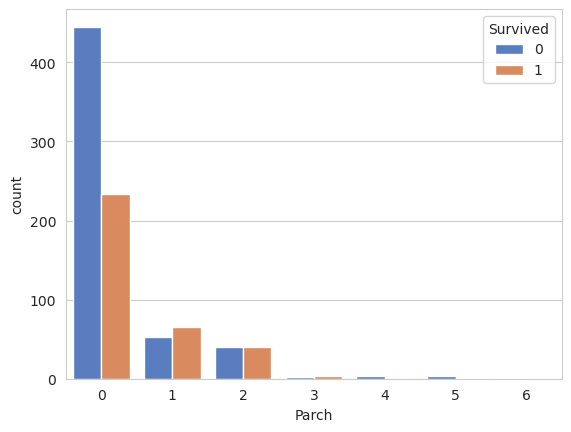

In [27]:
# Number of parch per passenger
sns.countplot(data=data, x='Parch', hue='Survived')

**Parch Insights** 

Having a small number of parents/children on board increased the likelihood of survival, while larger family 
groups were more vulnerable.

<Axes: xlabel='SibSp', ylabel='count'>

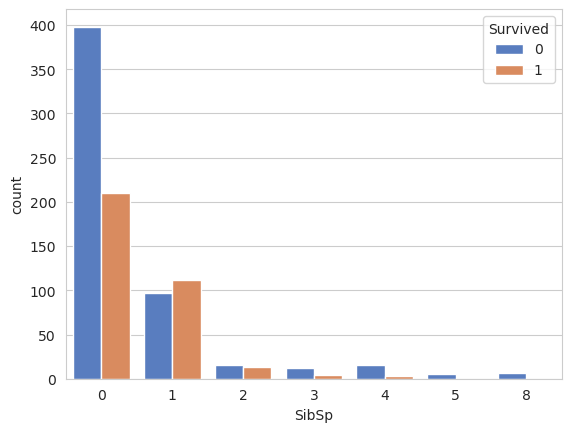

In [29]:
# Number of siblings per passenger
sns.countplot(data=data, x='SibSp', hue='Survived')

**SibSp Insights**
- The majority of passengers (over 600) had no siblings aboard.
- A significant portion of passengers had 1 sibling.
- Very few passengers had more than 2 siblings.

<Axes: xlabel='Fare', ylabel='Count'>

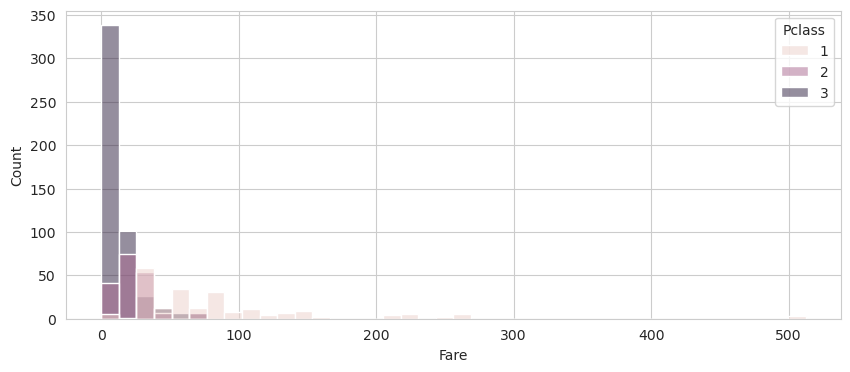

In [31]:
plt.figure(figsize=(10, 4)) 
sns.histplot(data=data, x='Fare', bins=40, hue='Pclass')

**Fare Price Insights**

- Most of the price of the tickets was under 100 pounds corresponding to the 3rd class.

-----------------------------

## 5. Data Preprocessing <a id="preprocessing"></a>

In this sections we will:
- Outlier Detection.
- Handling missing values.
- Feature Engineering.
- Feature selection.
- Encode categorical variables.

**Note**

We could use a *sklearn Pipeline* to handle all the steps (preprocessing, modeling, and hyperparameter tuning) in a single process, but I find it easier to document each step separately without using a pipeline.

### 5.1 Outlier Detection <a id="outlier">

To identify the outliers, we will use the Interquartile Range (IQR) method. 

In [36]:
# Define a function to detect outliers for all numerical features using IQR method
def detect_outliers_iqr_per_feature(data):
    outliers_dict = {}
    
    # Loop through each numerical feature
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        
        # Store the outliers for each feature
        outliers_dict[column] = outliers[column]

    # summary of outliers
    outliers_summary = {feature: len(outliers_dict[feature]) for feature in outliers_dict if len(outliers_dict[feature]) > 0}
    return outliers_summary

# Detecting outliers for all numerical features in the dataset
detect_outliers_iqr_per_feature(data)

{'Age': 11, 'SibSp': 46, 'Parch': 213, 'Fare': 116}

The number of outliers in the `Parch` and `Fare` features is notably high compared to the overall size of 
the dataset. To address this, we will implement a method that filters out passengers who are identified as outliers in more than two features, allowing us to focus on data points with consistent outlier behavior across multiple attributes. This approach ensures that only the most extreme and potentially problematic data points targeted 
removal.


In [38]:
# Detect outliers for all numerical features using IQR method and multiple features per outlier
def detect_outliers_iqr(data, min_nr_outlier_features):
    outlier_indices = []
    
    # Loop through each numerical feature
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outlier_list_col = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index
        # Appends the list of outlier indices to the outlier_indices list.
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers_indices = list(i for i, v in outlier_indices.items() if v >= min_nr_outlier_features)
    return multiple_outliers_indices
outlier_passengers_indices = detect_outliers_iqr(data, 3)
outlier_passengers = data.loc[outlier_passengers_indices]
outlier_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S


In [39]:
print('Passengers with more than two feature outliers size: ', len(outlier_passengers_indices))

Passengers with more than two feature outliers size:  11


Using this new method, we identified only 11 outliers. In this sample, two main patterns emerged:
- Passengers with a high number of siblings (8).
- First-class passengers who paid a fare of 263 pounds.

We will remove the outliers before splitting the data. This ensures consistency in outlier handling across the dataset.

In [41]:
# remove the outliers from the dataset
data = data.drop(outlier_passengers_indices,axis = 0).reset_index(drop = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  880 non-null    int64  
 1   Survived     880 non-null    int64  
 2   Pclass       880 non-null    int64  
 3   Name         880 non-null    object 
 4   Sex          880 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        880 non-null    int64  
 7   Parch        880 non-null    int64  
 8   Ticket       880 non-null    object 
 9   Fare         880 non-null    float64
 10  Cabin        200 non-null    object 
 11  Embarked     878 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.6+ KB


### 5.2. Handling missing values <a id="missing"></a>

<Axes: xlabel='Pclass', ylabel='Age'>

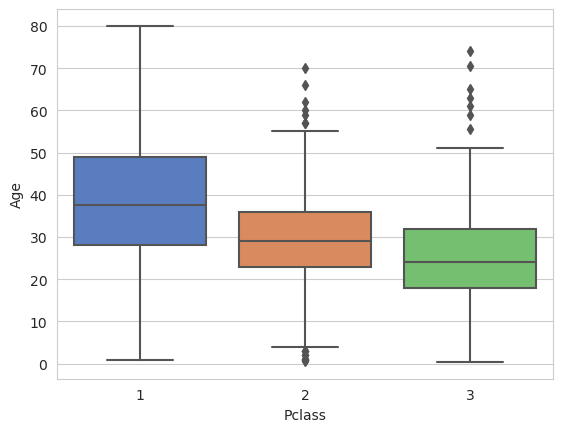

In [43]:
sns.boxplot(data=data,x='Pclass',y='Age')

**Age Imputation Insights**

It appears that older passengers were more likely to have higher-class tickets. Therefore, we'll impute the missing age values using the average age within each passenger class.

In [45]:
# Calculate median ages for each class
medians = data.groupby('Pclass')['Age'].median()

# Define the simplified imputation function
def impute_age(row):
    if pd.isnull(row['Age']):
        return medians[row['Pclass']]
    else:
        return row['Age']

# Apply the function to the dataset
data['Age'] = data.apply(impute_age, axis=1)

**Embarked Imputation Insights**

Since there are only 2 passengers missing embarkation information, we'll impute these values with the most common embarkation point. Embarkation is unlikely to be a key factor in determining whether a passenger survived.

In [47]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

**Cabin Imputation Insights**

As mentioned earlier, this feature will be removed due to the high number of missing values.

### 5.3. Feature Engineering <a id="transform"></a>

Optionally, we could create a new feature called `Family Size`, which would combine the number of parents/children (`Parch`) and siblings/spouses (`SibSp`) aboard. However, I chose not to include this feature because it is unlikely to significantly improve our model's performance. Additionally, the dataset is small enough that feature reduction is not necessary.

One notable feature that deserves further analysis is the `Title` within the name field (e.g., "Mr.", "Mrs.", "Miss.", "Master."). Titles can offer valuable insights into a passenger's social status or age, both of which may influence their likelihood of survival.

In [51]:
data['Title'] = data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [52]:
data['Title'].value_counts()

Title
Mr              513
Miss            177
Mrs             125
Master           39
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Don               1
Mme               1
Ms                1
Lady              1
Sir               1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

We have 17 titles with the most common titles in the dataset are "Mr", "Miss", "Mrs", and "Master"

`Title` will be mapped to:
- Keep the title if it has 10 or more passengers.
- Replace all other titles with oth


In [54]:
data['Title'] = data['Title'].map({title: (title if count >= 10 else 'Oth') for title, count in data['Title'].value_counts().items()})
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


<Axes: xlabel='Title', ylabel='count'>

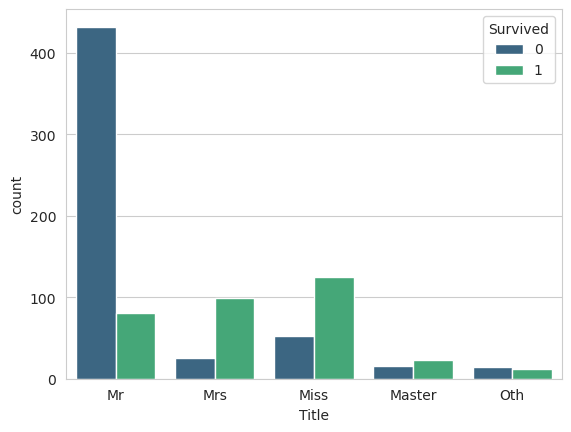

In [55]:
sns.countplot(data=data, x='Title', hue='Survived', palette='viridis')

The graph supports the idea that survival was heavily influenced by gender and age. Females (especially t
hose with "Mrs" and "Miss" titles) and young boys ("Master") had a higher chance of survival, while men ("Mr") h
ad a much lower survival rate. Rare titles, grouped as "Oth", show lower survival rates, though these groups are small in number.

### 5.4 Encode categorical variables<a id="encode"></a>

We will encode following categorical variables:

`Sex`will be encoded as follows:
- `male` => 0
- `female` => 1

`Embarked` will be represent by the columns `Q` and `S`: 
- `C` represented by `Q` = 0 and `S` = 0
- `Q` represented by `Q` = 1 and `S` = 0
- `S` represented by `Q` = 0 and `S` = 1

`Pclass` will be encoded as integer. It is a ordinal so it is only a cast conversion.

`Title` will be represented by the columns `Miss`, `Mr`, `Mrs` and `Oth`:
- `Master` represented by `Miss` = 0, `Mr` = 0, `Mrs`= 0 and `Oth` = 0
- `Miss` represented by `Miss` = 1, `Mr` = 0, `Mrs`= 0 and `Oth` = 0
- `Mr` represented by `Miss` = 0, `Mr` = 1, `Mrs`= 0 and `Oth` = 0
- `Mrs` represented by `Miss` = 0, `Mr` = 0, `Mrs`= 1 and `Oth` = 0
- `Oth` represented by `Miss` = 0, `Mr` = 0, `Mrs`= 0 and `Oth` = 1

In [59]:
# Converts 'male' to 0 and 'female' to 1
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


In [60]:
embark = pd.get_dummies(data=data['Embarked'], drop_first=True).astype(int)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [61]:
data['Pclass'] = data['Pclass'].astype('int')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


In [62]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


In [63]:
title = pd.get_dummies(data=data['Title'], drop_first=True).astype(int)
title.head()

,Miss,Mr,Mrs,Oth
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0


In [64]:
# Joining all the columns and drop the not needed ones
data = pd.concat([data,embark,title],axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Q,S,Miss,Mr,Mrs,Oth
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1,0,1,0,0


### 5.5. Feature Selection<a id="selection"></a>

To assist with feature selection, we will employ statistical analysis methods as follows:
- Numerical / Dummy features: We'll use a correlation matrix to examine the relationships between
  numerical features and the target variable.
- Categorical features: We'll apply the Chi-Square test to assess the dependency of each
  feature on the target variable.

In addition, we will manually select features that are likely to influence the target variable based on domain knowledge.

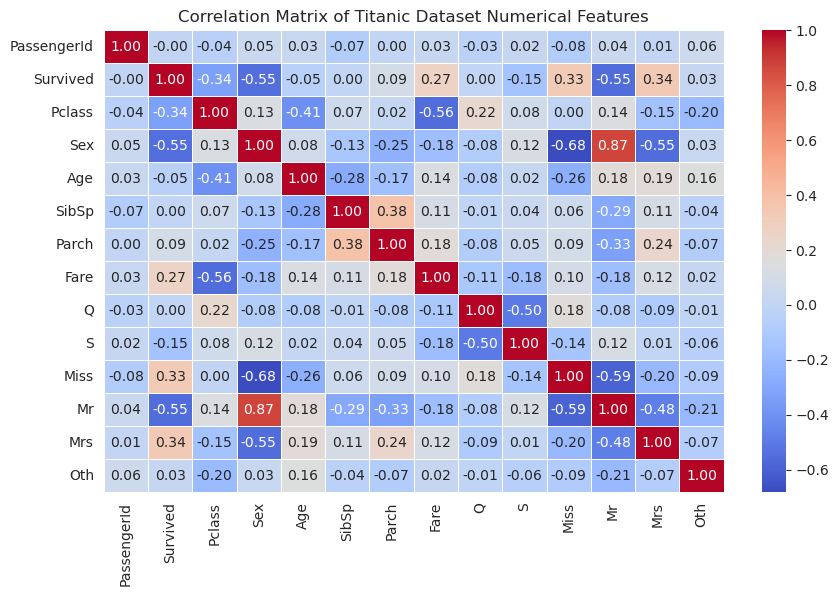

In [66]:
# Calculate the correlation matrix for the numerical features in the dataset
correlation_matrix = data.select_dtypes(include=['int64', 'float64']).corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Titanic Dataset Numerical Features")
plt.show()



**Correlation Matrix Insight**

- `Sex`, `Pclass`, and `Fare` show significant correlations with the target variable `Survived`, indicating
  they are important features for predicting survival.
- `Parch` and `SibSp` are moderately correlated with each other, reflecting the likelihood of
  passengers traveling with family members.
- `Fare` and `Pclass` have a strong inverse relationship, with lower-class passengers typically
  paying less for their tickets.
- `Titles` like "Miss" and "Mrs" are positively correlated with survival, while "Mr"
  is negatively correlated, indicating that gender and age (implied by titles) were important
  factors in survival.

In [68]:
# Categorical features
X_categorical = data[['Pclass', 'Sex', 'SibSp', 'Parch','Q','S','Miss','Mr','Mrs','Oth']]
# Target variable
y = data['Survived']

# Perform the chi-squared test
chi_scores, p_values = chi2(X_categorical, y)

# Display chi-square scores and p-values
for feature, score, p_val in zip(X_categorical.columns, chi_scores, p_values):
    print(f'Feature: {feature}, Chi2 Score: {score}, p-value: {p_val}')

Feature: Pclass, Chi2 Score: 29.935686960698533, p-value: 4.4661655054875525e-08
Feature: Sex, Chi2 Score: 92.02187424882386, p-value: 8.57236753024785e-22
Feature: SibSp, Chi2 Score: 0.022309368191721527, p-value: 0.8812670410251112
Feature: Parch, Chi2 Score: 13.328750657351064, p-value: 0.0002613675999685145
Feature: Q, Chi2 Score: 0.0034235916588857764, p-value: 0.9533412295590431
Feature: S, Chi2 Score: 5.335148302540611, p-value: 0.020899561882010927
Feature: Miss, Chi2 Score: 76.37680784806074, p-value: 2.3438785936775796e-18
Feature: Mr, Chi2 Score: 112.9442724458204, p-value: 2.2192550431648874e-26
Feature: Mrs, Chi2 Score: 86.7513899782135, p-value: 1.230572877425187e-20
Feature: Oth, Chi2 Score: 0.6197419138595612, p-value: 0.4311432085381227


**Categorical Variables Insights**

Using the significance of 0.05 ($\alpha = 0.05$) we can tell that:
- `Pclass`, `Sex`, and `Parch`, `Miss`, `Mr`, `Mrs`and `S` are statistically significant features.
- `SibSp`, `Q`, and `Oth` and might not be as useful, as it does not show statistical significance.


In [70]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Q,S,Miss,Mr,Mrs,Oth
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1,0,1,0,0


**Summary of the Feature Selection**

The following table gives us the resume of which Features will be selected or discarded:

| Feature            | Selected | Reason                                                                                                             |
|--------------------|----------|--------------------------------------------------------------------------------------------------------------------|
| PassengerId        | No       | Identifier. Does not provide useful information for predicting survival.                                           |
| Survived           | Yes      | Target variable.                                                                                                   |
| Pclass             | Yes      | Moderate correlation with Survival. Higher Class more chances to survive.                                          |
| Name               | No       | Not useful for the prediction. Extracted Title is relevant.                                                        |
| Sex                | Yes      | Strong Correlation with Survival.                                                                                  |
| Age                | No       | Surprisingly Age has a Weak Correlation with Survival. We can get a similar context with Features like Pclass and Title. |
| SibSp              | No       | Provides information about family size. Weak Correlation                                                           |
| Parch              | Yes      | Similar to SibSp, it provides insight into family size and relationships.                                          |
| Ticket             | No       | Identifier. Does not provide useful information for predicting survival.                                           |
| Fare               | Yes      | Higher fares are associated with higher survival rates.                                                            |
| Cabin              | No       | Too many missing values, and the available information doesn't significantly contribute to survival prediction.    |
| Embarked           | No       | Replaced with the Dummy variables Q and S                                                                          |
| Title              | No       | Replaced with the Dummy variables Miss, Mr, Mrs, Oth                                                               |
| Q, S               | Yes      | S has a significant relationship so we will include Q and S.                                                       |
| Miss, Mr, Mrs, Oth | Yes      | Miss, Mr, and Mrs are key predictors of survival                                                                   |

In [72]:
# remove Features that were filtered out
data = data.drop(['PassengerId','Name','Ticket','Cabin','Age','Embarked','Title','SibSp'],axis=1)

--------------------

## 6. Modeling <a id="modeling"></a>

In this phase we will proceed with the following steps:
- Splitting the data in train and validation sets.
- Model selection.
- Training.
- Evaluation.

### 6.1. Splitting Data <a id="splitting"></a>

We will split the data as follows:
- 80% for training the model.
- 20% for testing and validating the model.

The 80/20 split helps ensure that the model has a sufficient amount of data for training while reserving enough 
data to effectively evaluate its performance. This split provides a good balance between training the model and 
validating how well it can predict new, unseen data.

Before apply the models we will also Scale the dataset. Scaling ensures that all features contribute equally, improving
model convergence, numerical stability, and performance, especially in algorithms like logistic regression.

In [76]:
# Random State to make splitting reproducible
random_state = 42

# X represents the features or input variables of the dataset.
X = data.drop('Survived', axis = 1)

# y represents the target variable or output that the model is trying to predict.
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 6.2. Logistic Regression <a id="regression"></a>

To run Logistic Regression effectively, we need to tune the hyperparameters to find the best configuration. Once we identify the optimal hyperparameters, we can evaluate the model's performance using this optimized setup.

To evaluate the parameterization of the Logistic Regression model, we will create a custom scoring function that combines both accuracy and recall. Accuracy is 
essential because it indicates the proportion of correct predictions overall, providing a general sense of model performance. Recall for survival is particularly 
important in this scenario because we want the model to effectively identify and predict survivors, minimizing false negatives to ensure as many actual 
survivors as possible are correctly detected.

Our scoring equation will be the following:
$$score = 0.7 \times accuracy + 0.3 \times recal_{survived}$$

To reduce the Overfitting and have a better evaluation we will use Cross Validation using `StratifiedKFold` (by the documentation is better for classification tasks) with 10 folds.

In terms of Logistic Regression we will use the following parameters:

| Parameter| Possible Values       | Description |
|----------|-----------------------|-------------|
| C        | 0.01, 0.1, 1, 10, 100 | A smaller C value will penalize large coefficients more heavily, potentially reducing overfitting (increasing underfitting). |
| penalty  | 'l1', 'l2', 'none'    | Specifies the type of regularization to apply with the strengh C.
| solver   | 'liblinear', 'lbfgs'  | The algorithm used for optimization. These are optimized for small datasets with l1 and l2 penalization. |
| max_iter | 200, 500, 1000        | Specifies the maximum number of iterations the solver takes to converge. |


In [78]:
# Custom scorer to fine tuning the algorithms
def score_by_accuracy_recall(y_test, y_pred):
    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Recall for class 1 (survived)
    recall_survived = recall_score(y_test, y_pred, pos_label=1)
    # calculate the score
    result = 0.7 * accuracy + 0.3 * recall_survived
    return result

scorer = make_scorer(score_by_accuracy_recall, greater_is_better=True)

# Define the StratifiedKFold cross-validation strategy
cv_strategy = StratifiedKFold(n_splits = 10, shuffle = True, random_state = random_state)

# Define the parameter grid for logistic regression
log_reg_param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs'], 'penalty': ['l1', 'l2','none'],'max_iter': [200, 500, 1000]}

# Create the logistic regression model
log_reg_model = LogisticRegression()

# Set up GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(estimator=log_reg_model, param_grid=log_reg_param_grid, scoring=scorer, cv=cv_strategy, verbose=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best custom score
print("Best Logistic Regression hyperparameters:", grid_search.best_params_)
print("Best Logistic Regression custom metric score:", grid_search.best_score_)

# Get the best estimator
best_log_reg_model = grid_search.best_estimator_

Fitting 10 folds for each of 90 candidates, totalling 900 fits
[CV 1/10] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=0.793 total time=   0.0s
[CV 2/10] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=0.752 total time=   0.0s
[CV 3/10] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=0.824 total time=   0.0s
[CV 4/10] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 5/10] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=0.705 total time=   0.0s
[CV 6/10] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=0.877 total time=   0.0s
[CV 7/10] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=0.759 total time=   0.0s
[CV 8/10] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=0.822 total time=   0.0s
[CV 9/10] END C=0.01, max_iter=200, penalty=l1, solver=liblinear;, score=0.771 total time=   0.0s
[CV 10/10] END C=0.01, max_iter=200, penalty=l1, solver

[CV 8/10] END C=10, max_iter=500, penalty=l1, solver=liblinear;, score=0.841 total time=   0.0s
[CV 9/10] END C=10, max_iter=500, penalty=l1, solver=liblinear;, score=0.852 total time=   0.0s
[CV 10/10] END C=10, max_iter=500, penalty=l1, solver=liblinear;, score=0.749 total time=   0.0s
[CV 1/10] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time

[CV 2/10] END C=100, max_iter=200, penalty=l1, solver=liblinear;, score=0.801 total time=   0.1s
[CV 3/10] END C=100, max_iter=200, penalty=l1, solver=liblinear;, score=0.822 total time=   0.0s
[CV 4/10] END C=100, max_iter=200, penalty=l1, solver=liblinear;, score=0.762 total time=   0.1s
[CV 5/10] END C=100, max_iter=200, penalty=l1, solver=liblinear;, score=0.736 total time=   0.0s
[CV 6/10] END C=100, max_iter=200, penalty=l1, solver=liblinear;, score=0.854 total time=   0.0s
[CV 7/10] END C=100, max_iter=200, penalty=l1, solver=liblinear;, score=0.769 total time=   0.1s
[CV 8/10] END C=100, max_iter=200, penalty=l1, solver=liblinear;, score=0.819 total time=   0.0s
[CV 9/10] END C=100, max_iter=200, penalty=l1, solver=liblinear;, score=0.852 total time=   0.1s
[CV 10/10] END C=100, max_iter=200, penalty=l1, solver=liblinear;, score=0.771 total time=   0.0s
[CV 1/10] END C=100, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=100, max_iter=200, 

[CV 9/10] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.852 total time=   0.0s
[CV 10/10] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.771 total time=   0.0s
[CV 1/10] END C=100, max_iter=500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/10] END C=100, max_iter=500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/10] END C=100, max_iter=500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/10] END C=100, max_iter=500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/10] END C=100, max_iter=500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 6/10] END C=100, max_iter=500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 7/10] END C=100, max_iter=500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 8/10] END C=100, max_iter=500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 9/10] END C=100, max_iter=500, pe

**Insights Hyperparameter Tuning for Logistic Regression**
- Best Hyperparameters: The optimal configuration for logistic regression was found to be C=10, max_iter=200, penalty='l2', and solver='liblinear'.
- Best Custom Metric Score: Achieved a score of 0.80 based on the custom combination of accuracy and recall.

In [80]:
# define the scoring for cross validation
cv_scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'scorer': scorer
}

# Use cross-validation to evaluate the model with the best parameters
cv_results = cross_validate(best_log_reg_model, X_train, y_train, cv=cv_strategy, scoring=cv_scoring, return_train_score=True)

# Print cross-validation results
print("Cross-Validation Results for Logistic Regression:")
print("\tTrain Data")
print(f"\t\tMean Accuracy: {cv_results['train_accuracy'].mean():.4f}")
print(f"\t\tMean Recall: {cv_results['train_recall'].mean():.4f}")
print(f"\t\tMean Scorer: {cv_results['train_scorer'].mean():.4f}")
print("\tTest Data")
print(f"\t\tMean Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"\t\tMean Recall: {cv_results['test_recall'].mean():.4f}")
print(f"\t\tMean Scorer: {cv_results['test_scorer'].mean():.4f}")


Cross-Validation Results for Logistic Regression:
	Train Data
		Mean Accuracy: 0.8218
		Mean Recall: 0.7439
		Mean Scorer: 0.7984
	Test Data
		Mean Accuracy: 0.8166
		Mean Recall: 0.7405
		Mean Scorer: 0.7938


**Cross-Validation Insights**

Overall, the model demonstrated consistent performance between the training and test sets, indicating good generalization
with balanced accuracy and recall.

**Evaluation**

To evaluate the best model, we will use the following metrics:
- Accuracy: Indicates the proportion of correct predictions.
- Confusion Matrix: Provides a visual representation of true positives, false positives, true negatives, and false negatives.
- Precision, Recall, and F1-Score: Essential for assessing models, especially when dealing with imbalanced classes.
- ROC-AUC Score: Evaluates the model's capacity to differentiate between classes.
- List of the Features Ordered by Importance descending.

In [82]:
# Predict on the test set
y_pred = best_log_reg_model.predict(X_test)
# predict_proba will return an array with two columns: one for the probability of class 0 (did not survive) and one for the probability of class 1 (survived).
y_prob = best_log_reg_model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.77
Confusion Matrix:
[[78 20]
 [20 58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        98
           1       0.74      0.74      0.74        78

    accuracy                           0.77       176
   macro avg       0.77      0.77      0.77       176
weighted avg       0.77      0.77      0.77       176



ROC-AUC Score: 0.84


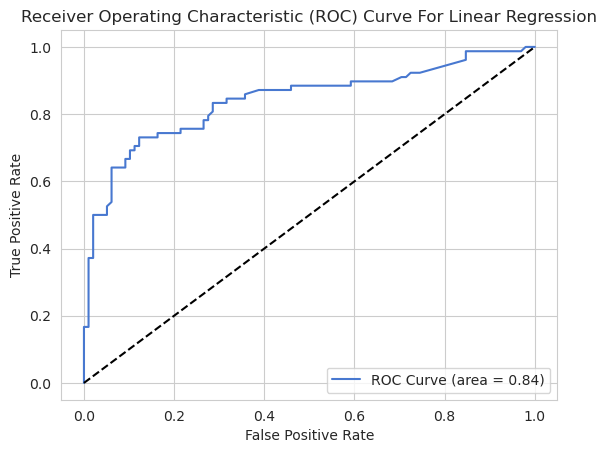

In [83]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve For Linear Regression")
plt.legend(loc="lower right")
plt.show()

In [84]:
# Calculate permutation importance
perm_importance = permutation_importance(best_log_reg_model, X_test, y_test, scoring=cv_scoring)

# Create a DataFrame for permutation importance
perm_importance_df = pd.DataFrame({
    'Feature': X.columns, 
    'Importance Scorer': perm_importance['scorer'].importances_mean,
    'Importance Accuracy': perm_importance['accuracy'].importances_mean,
    'Importance Recall': perm_importance['recall'].importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance Scorer', ascending=False)

# Display the top features
print("Top features for Logistic Regression by Our Scorer:")
print(perm_importance_df)

Top features for Logistic Regression by Our Scorer:
  Feature  Importance Scorer  Importance Accuracy  Importance Recall
1     Sex           0.281573             0.268182           0.312821
7      Mr           0.258234             0.256818           0.261538
6    Miss           0.045988             0.026136           0.092308
0  Pclass           0.031267             0.021591           0.053846
9     Oth           0.026783             0.027273           0.025641
8     Mrs           0.026547             0.017045           0.048718
2   Parch           0.002334             0.001136           0.005128
3    Fare           0.000000             0.000000           0.000000
4       Q          -0.001591            -0.002273           0.000000
5       S          -0.002439            -0.005682           0.005128


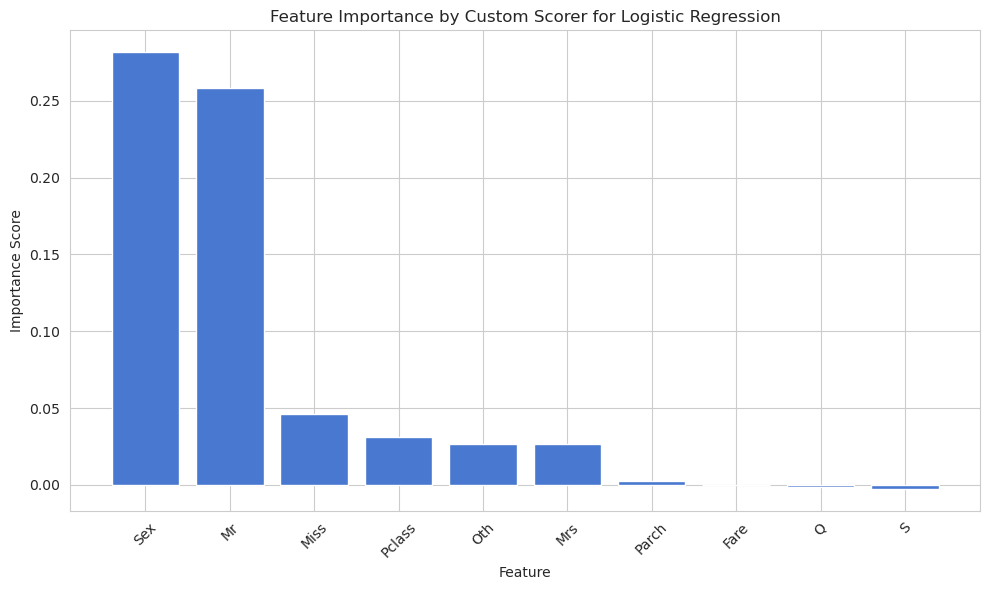

In [85]:
# Plot with only the Importance Scorer
plt.figure(figsize=(10, 6))
plt.bar(perm_importance_df['Feature'], perm_importance_df['Importance Scorer'], label='Scorer')

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance by Custom Scorer for Logistic Regression')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

**Evaluation Insights**

- *Accuracy*: The Logistic Regression predicts correctly the survival of 77% of the passengers. This is a reasonably score if we have in account the dataset size (891 entries) and the
  target class imbalance (540 No survivors vs 340 survivors).
- *Confusion Matrix*:
  - True Negatives: Correctly predicted 78 passengers did not survive.
  - False Positives: Incorrectly predicted that 20 passengers survived when they did not.
  - False Negatives: Missed 20 passengers who actually survived but were predicted as not surviving.
  - True Positives: The model correctly predicted that 58 passengers survived.
- *Precision For Survival*: Predicted a passenger survived correctly 74%.
- *Recall For Survival *: Model correctly identified 74% of actual survivors.
- *F1-Score For Survival*: The F1-score, which balances precision and recall, is 0.74 for the "Survived" class. This indicates a moderate balance,
  implying the model has an acceptable level of precision and recall without heavily sacrificing one for the other.
- *ROC-AUC*: The AUC of 0.84 demonstrates that the model has good discriminative ability to distinguish between passengers who survived and those who did not.
  The ROC curve, being well above the diagonal line (random classifier), reinforces that the model is effective in ranking positive cases higher than negative ones.
- *Sex, Titles*: These are the most important Features to do the Logist Regression Classification.

*Summary*:

Logistic Regression performs quite well in predicting survival in the Titanic since its reasonable accuracy and AUC score were shown. However, the number of false negatives is comparatively high (21). This means the model will miss a notable portion of the survivors. If the main goal is to identify as many actual survivors as possible, then improving recall can be crucial.

Sex and Titles (Mr, Miss, Mrs) are key predictors in determining survival on the Titanic. This reflects
the historical reality where women and children were prioritized during evacuation.
Pclass (passenger class) impacts the recall score more, aligning with the fact that 
higher-class passengers had a higher survival rate.

-------------------------------

### 6.3. Support Vector Machine (SVM) <a id="svm"></a>

To run a Support Vector Machine effectively, it's important to tune the hyperparameters to identify the optimal configuration. We 
will follow the same strategy used for logistic regression to select and evaluate the SVM model.

I terms of the parametization we will have (adjusted for small datasets):


| Parameter| Possible Values                       | Description |
|-------------|----------------------------|-------------|
| Probability | true | Keep the probabilities with the model calculate ROC-AUC score | 
| C        | 1, 10, 100 | A smaller C value will penalize large coefficients more heavily, potentially reducing overfitting (increasing underfitting). |
| gamma  | 0.01, 0.1, 1   | Controls how far the influence of a single training example reaches.
| kernel   | 'rbf' | The algorithm used for optimization. These are optimized for small datasets|

In [89]:
# Define the parameter grid for SVM
svm_param_grid = {'probability':[True], 'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1], 'kernel': ['rbf']}

# Create the SVM model
svm_model = SVC()

# Set up GridSearchCV with StratifiedKFold - SLOW PROCESS the linear kernel consumes too much processing power
# you can consider remove it
grid_search = GridSearchCV(svm_model, param_grid=svm_param_grid, scoring=scorer,cv=cv_strategy, verbose=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best custom score
print("Best SVM hyperparameters:", grid_search.best_params_)
print("Best SVM custom metric score:", grid_search.best_score_)

# Get the best estimator
best_svm_model = grid_search.best_estimator_

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END C=1, gamma=0.01, kernel=rbf, probability=True;, score=0.811 total time=   0.1s
[CV 2/10] END C=1, gamma=0.01, kernel=rbf, probability=True;, score=0.781 total time=   0.1s
[CV 3/10] END C=1, gamma=0.01, kernel=rbf, probability=True;, score=0.761 total time=   0.1s
[CV 4/10] END C=1, gamma=0.01, kernel=rbf, probability=True;, score=0.742 total time=   0.1s
[CV 5/10] END C=1, gamma=0.01, kernel=rbf, probability=True;, score=0.703 total time=   0.1s
[CV 6/10] END C=1, gamma=0.01, kernel=rbf, probability=True;, score=0.822 total time=   0.1s
[CV 7/10] END C=1, gamma=0.01, kernel=rbf, probability=True;, score=0.726 total time=   0.1s
[CV 8/10] END C=1, gamma=0.01, kernel=rbf, probability=True;, score=0.758 total time=   0.1s
[CV 9/10] END C=1, gamma=0.01, kernel=rbf, probability=True;, score=0.736 total time=   0.1s
[CV 10/10] END C=1, gamma=0.01, kernel=rbf, probability=True;, score=0.711 total time=   0.1s
[CV 1/10

**Insights Hyperparameter Tuning for SVM**

- Best SVM hyperparameters: Configuration `C=10`, `gamma=0.1`, `kernel='rbf'`, `probability=True` indicate that the model captures non-linear relationships well, balancing training fit and generalization. 
- Best SVM custom metric score: 0.798 shows a good balance between accuracy and recall.

In [91]:
# Use cross-validation to evaluate the model with the best parameters for svm
cv_results = cross_validate(best_svm_model, X_train, y_train, cv=cv_strategy, scoring=cv_scoring, return_train_score=True)

# Print cross-validation results for svm
print("Cross-Validation Results for SVM:")
print("\tTrain Data")
print(f"\t\tMean Accuracy: {cv_results['train_accuracy'].mean():.4f}")
print(f"\t\tMean Recall: {cv_results['train_recall'].mean():.4f}")
print(f"\t\tMean Scorer: {cv_results['train_scorer'].mean():.4f}")
print("\tTest Data")
print(f"\t\tMean Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"\t\tMean Recall: {cv_results['test_recall'].mean():.4f}")
print(f"\t\tMean Scorer: {cv_results['test_scorer'].mean():.4f}")

Cross-Validation Results for SVM:
	Train Data
		Mean Accuracy: 0.8709
		Mean Recall: 0.7540
		Mean Scorer: 0.8358
	Test Data
		Mean Accuracy: 0.8295
		Mean Recall: 0.7292
		Mean Scorer: 0.7994


**Cross-Validation Insights**

The cross-validation results for the best SVM model show strong training performance with a mean accuracy of 0.8649 and mean recall of 0.7383, suggesting it fits the training data well. On the test data, a mean accuracy of 0.8366 and mean recall of 0.7064 indicate good generalization, though recall is slightly lower.

For the evaluation of the model we will use similar methods applied in Logistic Regression

In [93]:
# Predict on the test set
y_pred = best_svm_model.predict(X_test)
# predict_proba will return an array with two columns: one for the probability of class 0 (did not survive) and one for the probability of class 1 (survived).
y_prob = best_svm_model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.77
Confusion Matrix:
[[81 17]
 [23 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80        98
           1       0.76      0.71      0.73        78

    accuracy                           0.77       176
   macro avg       0.77      0.77      0.77       176
weighted avg       0.77      0.77      0.77       176



ROC-AUC Score: 0.80


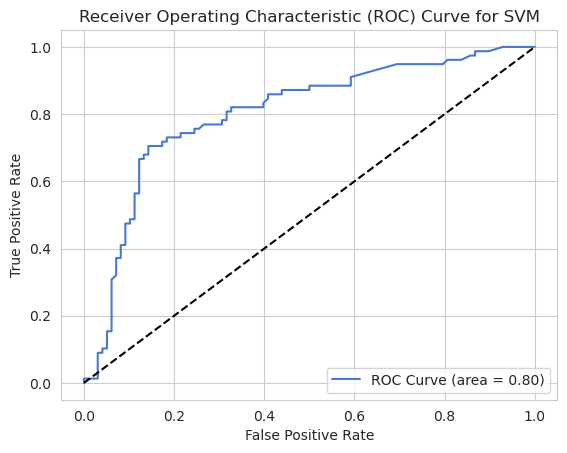

In [94]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve for SVM")
plt.legend(loc="lower right")
plt.show()

In [95]:
# Calculate permutation importance
perm_importance = permutation_importance(best_svm_model, X_test, y_test, scoring=cv_scoring)

# Create a DataFrame for permutation importance
perm_importance_df = pd.DataFrame({
    'Feature': X.columns, 
    'Importance Scorer': perm_importance['scorer'].importances_mean,
    'Importance Accuracy': perm_importance['accuracy'].importances_mean,
    'Importance Recall': perm_importance['recall'].importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance Scorer', ascending=False)

# Display the top features
print("Top features for Logistic Regression by Our Scorer:")
print(perm_importance_df)

Top features for Logistic Regression by Our Scorer:
  Feature  Importance Scorer  Importance Accuracy  Importance Recall
0  Pclass           0.080962             0.075000           0.094872
7      Mr           0.057124             0.142045          -0.141026
1     Sex           0.035778             0.117045          -0.153846
5       S           0.019913             0.029545          -0.002564
9     Oth           0.018427             0.031818          -0.012821
3    Fare           0.017762             0.036364          -0.025641
4       Q           0.015297             0.029545          -0.017949
8     Mrs           0.013383             0.046591          -0.064103
6    Miss           0.006722             0.057955          -0.112821
2   Parch          -0.022675            -0.015909          -0.038462


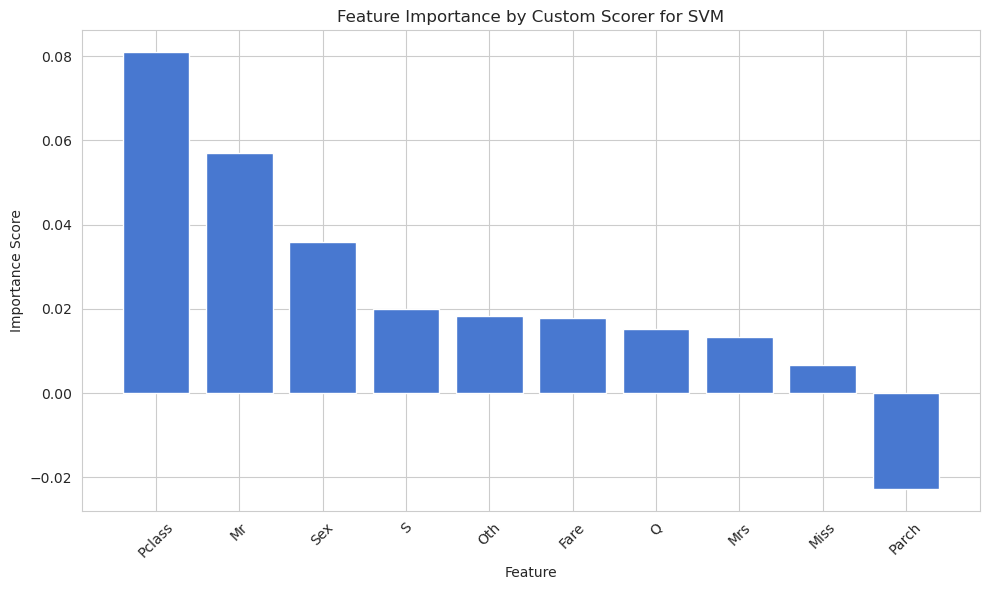

In [96]:
# Plot with only the Importance Scorer
plt.figure(figsize=(10, 6))
plt.bar(perm_importance_df['Feature'], perm_importance_df['Importance Scorer'], label='Scorer')

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance by Custom Scorer for SVM')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

**Evaluation Insights**

The SVM model's evaluation shows an overall accuracy of 0.77, indicating that 77% of the predictions were correct. The confusion matrix reveals that the model correctly predicted 81 out of 98 non-survivors (class 0) and 55 out of 78 survivors (class 1), with 17 false positives and 23 false negatives.

*Classification highlights*:

- Precision for class 0 (non-survivors) is 0.77, and for class 1 (survivors) is 0.76, showing the model's ability to correctly label positive predictions is balanced between both classes.
- Recall for class 0 is 0.83, indicating that most non-survivors were correctly identified, while recall for class 1 is lower at 0.71, suggesting that the model struggles more to correctly identify survivors and may miss some (false negatives).
- F1-scores indicate a balanced performance for both classes, with room for improvement in recall for survivors.
- The ROC-AUC score of 0.80 indicates that your SVM model has a good ability to distinguish between the positive class (survivors) and the negative class (non-survivors).
- The SVM model places the most emphasis on socio-economic indicators such as Pclass and Mr, followed by Sex, when predicting survival. 

------------------

### 6.4. Model Comparison <a id="comparison"></a>


### Model Performances

First, let's gather the metrics for both models so we can analyze them afterward.

#### Logistic Regression

**Accuracy**: 0.77

**Confusion Matrix**:

|     | Predicted 0 | Predicted 1 |
|-----|--------------|-------------|
| **Actual 0** |     78       |     20        |
| **Actual 1** |     20       |     58        |

**Classification Report**:

| Class | Precision | Recall | F1-Score | Support |
|-------|------------|--------|----------|---------|
| 0     | 0.80       | 0.80   | 0.80     | 98      |
| 1     | 0.74       | 0.74   | 0.74     | 78      |

**ROC-AUC Score**: 0.84

**Top Features by Our Scorer**

| Feature | Importance Scorer | Importance Accuracy | Importance Recall    |
|---------|--------------------|---------------------|-----------------------|
| Sex     | 0.287063           | 0.272727            | 0.320513              |
| Mr      | 0.240227           | 0.243182            | 0.233333              |
| Miss    | 0.035114           | 0.021591            | 0.066667              |
| Mrs     | 0.027264           | 0.014773            | 0.056410              |
| Pclass  | 0.024135           | 0.012500            | 0.051282              |

#### SVM

**Accuracy**: 0.77

**Confusion Matrix**:

|              | Predicted 0 | Predicted 1 |
|--------------|--------------|------------|
| **Actual 0** |     81       |     17     |
| **Actual 1** |     23       |     55     |

**Classification Report**:

| Class | Precision | Recall | F1-Score | Support |
|-------|------------|--------|----------|---------|
| 0     | 0.78       | 0.83   | 0.80     | 98      |
| 1     | 0.76       | 0.71   | 0.73     | 78      |

**ROC-AUC Score**: 0.80

**Top Features by Our Scorer**:

| Feature | Importance Scorer | Importance Accuracy | Importance Recall    |
|---------|--------------------|---------------------|-----------------------|
| Pclass  | 0.070778           | 0.067045            | 0.079487              |
| Mr      | 0.062614           | 0.146591            | -0.133333             |
| Sex     | 0.040420           | 0.118182            | -0.141026             |
| Oth     | 0.020787           | 0.034091            | -0.010256             |
| Miss    | 0.020140           | 0.072727            | -0.102564             |



**Model Comparison**

- Both Logistic Regression and SVM achieve an accuracy of 0.77, *indicating similar overall performance* in correctly predicting the survival status.
- Logistic Regression performs slightly better in terms of recall for survivors, making it more reliable for correctly identifying true survivors.
- SVM achieves better precision and a higher true positive rate for non-survivors but sacrifices recall for survivors, potentially missing more actual survivors.
- Both models agree on the importance of features such as Sex and Pclass, aligning with historical insights where these factors influenced survival.
  If you are a woman holding a ticket in a higher class, you have a greater chance of survival.
- Logistic Regression is better if you want to focus on correctly identifying survivors. On the other hand, SVM is a good choice if you want to avoid mistakenly identifying non-survivors as survivors.

**Model Insights**

An interesting observation is that while both models achieve the same overall accuracy of 77%, they rely on completely different sets of important features. According to the scikit-learn documentation, logistic regression provides a more straightforward, linear interpretation, making it easier to identify and understand the most influential features. In contrast, SVM focuses on finding complex, non-linear relationships among features, which reduces interpretability. This is achieved using kernel functions like RBF, which often enhances precision at the expense of recall, as seen in our analysis.

Due to historical reasons, we know that the Titanic prioritized saving women and children, especially those in the first class. These characteristics are straightforward and easily identifiable, which likely contributes to logistic regression's better performance in identifying survivors.

Another key observation is that logistic regression is computationally more efficient, performing faster and using fewer resources compared to SVM. This is because logistic regression solves a simpler optimization problem and is less computationally intensive, making it suitable for larger datasets and quicker iterations. On the other hand, SVM, particularly when using non-linear kernels, involves more complex calculations and optimization processes, which require more time and computational power, especially as the dataset size increases. 

--------------------

## 7. Conclusion <a id="conclusion"></a>

In this exercise, the performance of Logistic Regression and SVM for the prediction of survivors in the Titanic dataset was compared, considering metrics such as accuracy, precision, recall, and ROC-AUC scores. Though both models had the same general performance (77% accuracy), but they are not equally effective in recognizing the specified groups. Logistic Regression also produced a better balance in recall for the prediction of survivors, which agreed with the historical data emphasizing gender and passenger class as main predictors. SVM, while giving roughly equal accuracy, had slightly higher precision and lower recall, indicating greater conservativeness in accepting true positive cases.

The feature importance analysis explained that Logistic Regression relies on simple and interpretable relationships, while features such as Sex, Title and Pclass have been the most contributing. This is probably why it performed reliably to identify survivors since these features match the historical rescue priorities. On the contrary, SVM-especially with nonlinear kernels, such as RBF-can spot more complex nonlinear interactions of features (Including the Fare Price or the Embarking Location). However, these are usually at the expense of interpretability and computational efficiency, since the decision processes are less interpretable and the training computationally heavier.

Logistic Regression allows for quick training, ease of interpretation, and high performance in the case of simple linear relationships. The SVM method does well with sets of data that have non-linear and more complex patterns. Which of these two models is to be used, would therefore depend on the specific application needs, and would typically be logistic regression for problems needing quick insights and interpretability, and SVM when precision is required in complex tasks with non-linear relationships, provided that the computational resources are not limited.

---------------------